# 1 Data Collection & Cleaning

## 1.1 LSOA Energy Consumption

## 1.1.1 LSOA Energy Consumption - Data Cleaning

This notebook reads in the LSOA Electricity Consumption csv file type and cleans the data, outputting to csv the cleaned data.
Electricity consumption data is provided for 2010 to 2018 and published in individual sheets within the workbook.
Data is available from https://www.gov.uk/government/statistics/lower-and-middle-super-output-areas-electricity-consumption and licensed under Open Government Licence v3.0.

Libraries used include:
1. numpy - (scientific numerical package for Python that enables working with arrays)
2. pandas - (data analysis library)
3. matplotlib - (enables plotting and visualisation in Python)
4. openpyxl / load_workbook (opens Excel xlsx files)

In [1]:
#Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook

The Excel workbook is organised with electricity consumption data stored in unique tabs for each year. The tab label naming convention differs so they need to be read / printed to screen in order to set-up a dictionary for future look-up.

In [3]:
#Read sheet names from LSOA Energy Consumption raw data set

In [4]:
def get_sheetnames_xlsx(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    return wb.sheetnames

print(get_sheetnames_xlsx("LSOA_domestic_elec_2010-18.xlsx"))

['Title ', '2010r', '2011r', '2012r', '2013r', '2014r', '2015r', '2016r', '2017r', '2018', 'ANNEX Sub-national publication ']


In [5]:
#Create dictionary of sheet names to years

In [6]:
Years = {"2010r": 2010, "2011r": 2011, "2012r": 2012, "2013r": 2013, "2014r": 2014, "2015r": 2015, "2016r": 2016, "2017r":2017, "2018": 2018}

The function 'setup_df_LSOA_energyconsumption' takes the Excel xlsx workbook as input (filepath) and undertakes the following steps returning a new dataframe titled df_LSOA_Consumption_kWh.
1. Sets the tab names as a list
2. Removes the list items (tab names) at index 0 and 9 - removing the Title and Annex sheets from the original xlsx file.
3. Sets a new empty data frame 'df_LSOA_Consumption_kWh'
4. Cycles through each of the remaining tabs consisting of annual electricity data and,
4.a Renames columns - required to tidy up the multi-row header
4.b Drops rows containing zero
4.c Creates a new column / feature variable 'Year' with all entries filled with the year that data corresponds to.
4.d Changes the data type to integer for 'number of meters' and float for other numeric fields.
4.e Drops rows where the local authority name is unallocated - 'unallocated' if not removed results in a large outlier, as this row entry sums all unallocated meter data together and is not useful as is not geographically identifiable.
4.f Adds the data just cleaned to the new data frame defined above 'df_LSOA_Consumption_kWh'
5. Once all tabs / years have been processed and all added to the new data frame return the data frame.

In [7]:
#Set up dataframe for LSOA Energy Consumption per year

In [8]:
def setup_df_LSOA_energyconsumption(filepath):
    wb = load_workbook(filepath, read_only=True, keep_links=False)
    sheetname_list = wb.sheetnames
    del sheetname_list[0]
    del sheetname_list[9]   
      
    #Define empty notebook df_LSOA_Consumption_kWh 
    df_LSOA_Consumption_kWh = None
        
    for eachsheet in sheetname_list:
        df = pd.read_excel(filepath, sheet_name=eachsheet)
        df = df.rename(columns={"Lower Layer Super Output Area (LSOA) domestic electricity consumption, " + str(Years[eachsheet]): 'Local authority name', 'Unnamed: 1': 'Local authority code', 'Unnamed: 2': 'MSOA name', 'Unnamed: 3': 'MSOA code', 'Unnamed: 4': 'LSOA name', 'Unnamed: 5': 'LSOA code', 'Unnamed: 6': 'Total_number_of_domestic_electricity_meters', 'Unnamed: 7': 'Total_domestic_electricity_consumption_kWh', 'Unnamed: 8': 'Mean_domestic_electricity_consumption_kWh_per_meter', 'Unnamed: 9': 'Median_domestic_electricity_consumption_kWh_per_meter'})
        df = df.drop([0])
        df["Year"] = Years[eachsheet]
        df = df.astype({'Total_number_of_domestic_electricity_meters': 'int64', 'Total_domestic_electricity_consumption_kWh': 'float64', 'Mean_domestic_electricity_consumption_kWh_per_meter': 'float64', 'Median_domestic_electricity_consumption_kWh_per_meter': 'float64'})
                  
        #Remove 'unallocated'
        df = df.drop(df.loc[df['Local authority name'] == 'Unallocated'].index)                                                
        
        #Add Ratio of Consumption / Number of meter points
        df["Ratio_Consumption_per_Meter"] = df.Total_domestic_electricity_consumption_kWh / df.Total_number_of_domestic_electricity_meters
        
        #Add each df year to master df
        if df_LSOA_Consumption_kWh is None:
            df_LSOA_Consumption_kWh = df
        else:
            df_LSOA_Consumption_kWh = pd.concat([df_LSOA_Consumption_kWh, df], axis=0)                   
    
    return df_LSOA_Consumption_kWh       
    

Runs the function 'setup_df_LSOA_energyconsumption' on the LSOA domestic electricity data - downloaded (XX/09/2020).

In [9]:
df_LSOA_Consumption = setup_df_LSOA_energyconsumption("LSOA_domestic_elec_2010-18.xlsx")

Saves the data frame to the folder '1_DataCleaning' as a csv.

In [10]:
df_LSOA_Consumption.to_csv('1_DataCleaning/LSOA_Consumption.csv')

The following pandas dataframe functions are run to visually check that the data frame is as expected:
1. .head() - displays the top entries
2. .tail() - displays the last entries
3. .info() - provides the number of entries / feature vectors, null objects and data types for each feature variable / column.
4. .describe() - provides a statistical overview
5. .idmax - displays the maximum value and feature vector for the requested column and is a useful manual check on potential outliers, enabling further removal/cleaning if required.

In [11]:
df_LSOA_Consumption.head()

,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
1,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001A,E01011954,962,3061223.7,3182.145218,2812.65,2010,3182.145218
2,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001B,E01011969,638,2184541.4,3424.046082,3050.75,2010,3424.046082
3,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001C,E01011970,452,1813380.3,4011.903319,3479.90,2010,4011.903319
4,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001D,E01011971,530,2076311.2,3917.568302,3672.20,2010,3917.568302
5,Hartlepool,E06000001,Hartlepool 001,E02002483,Hartlepool 001F,E01033465,746,2620861.5,3513.219169,3077.10,2010,3513.219169


In [12]:
df_LSOA_Consumption.tail()

,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
41722,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008B,W01001300,704,2271891.900,3227.119176,2998.50,2018,3227.119176
41723,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008C,W01001301,799,2533021.100,3170.239174,2923.30,2018,3170.239174
41724,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008D,W01001308,509,1908250.843,3749.019338,3335.20,2018,3749.019338
41725,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008E,W01001309,538,1797512.000,3341.100372,3054.35,2018,3341.100372
41726,Merthyr Tydfil,W06000024,Merthyr Tydfil 008,W02000415,Merthyr Tydfil 008F,W01001898,685,2524077.700,3684.784964,2875.50,2018,3684.784964


In [13]:
df_LSOA_Consumption.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375526 entries, 1 to 41726
Data columns (total 12 columns):
Local authority name                                     375526 non-null object
Local authority code                                     375526 non-null object
MSOA name                                                375526 non-null object
MSOA code                                                375526 non-null object
LSOA name                                                375526 non-null object
LSOA code                                                375526 non-null object
Total_number_of_domestic_electricity_meters              375526 non-null int64
Total_domestic_electricity_consumption_kWh               375526 non-null float64
Mean_domestic_electricity_consumption_kWh_per_meter      375526 non-null float64
Median_domestic_electricity_consumption_kWh_per_meter    375526 non-null float64
Year                                                     375526 non-null int64
Ratio_Con

In [14]:
df_LSOA_Consumption.describe()

,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
count,375526.000000,3.755260e+05,375526.000000,375526.000000,375526.000000,375526.000000
mean,663.735576,2.590435e+06,3921.818459,3227.480156,2013.999870,3921.818537
std,201.550599,9.733531e+05,901.624874,671.757559,2.582055,901.624910
min,21.000000,6.472580e+04,125.437597,171.600000,2010.000000,125.437597
25%,550.000000,2.052857e+06,3351.830250,2794.900000,2012.000000,3351.799344
50%,658.000000,2.462771e+06,3730.000000,3131.900000,2014.000000,3730.034118
75%,764.000000,2.990409e+06,4235.859815,3534.000000,2016.000000,4235.820913
max,6348.000000,1.620890e+07,14355.233560,10559.550000,2018.000000,14355.233562


In [15]:
df_LSOA_Consumption.loc[df_LSOA_Consumption['Total_number_of_domestic_electricity_meters'].idxmax()]

,Local authority name,Local authority code,MSOA name,MSOA code,LSOA name,LSOA code,Total_number_of_domestic_electricity_meters,Total_domestic_electricity_consumption_kWh,Mean_domestic_electricity_consumption_kWh_per_meter,Median_domestic_electricity_consumption_kWh_per_meter,Year,Ratio_Consumption_per_Meter
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,1735,9093160.65,5241.014784,3576.70,2010,5241.014784
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,1713,8956404.30,5228.490543,3602.60,2011,5228.490543
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,1647,8656846.50,5256.130237,3678.70,2012,5256.130237
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,4156,8149061.80,1960.794466,882.75,2013,1960.794466
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,4187,11460614.00,2737.000000,2160.00,2014,2737.189873
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,4284,12160681.49,2838.627798,2301.45,2015,2838.627799
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,4555,13073163.10,2870.068738,2385.30,2016,2870.068738
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,5725,14154986.74,2472.486768,2150.00,2017,2472.486767
31577,Newham,E09000025,Newham 013,E02000726,Newham 013G,E01033583,6348,16208903.47,2553.387440,2148.10,2018,2553.387440


## 1.1.2 LSOA Energy Consumption Data Graphical Plots

Scatter plot of total and mean electricity consumption against year in kWh, showing the variance and any overall trend across the full data set. It can be seen from the below plots that the variance across LSOA's in the UK is significant and there is no obvious trend or change in electricity consumption year on year.

In [4]:
df_LSOA_Consumption = pd.read_csv('1_DataCleaning/LSOA_Consumption.csv')

In [28]:
plt.rcParams['figure.figsize'] = [16, 12]

In [29]:
plt.style.use('seaborn-darkgrid')

In [32]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('axes', titlesize=20) 

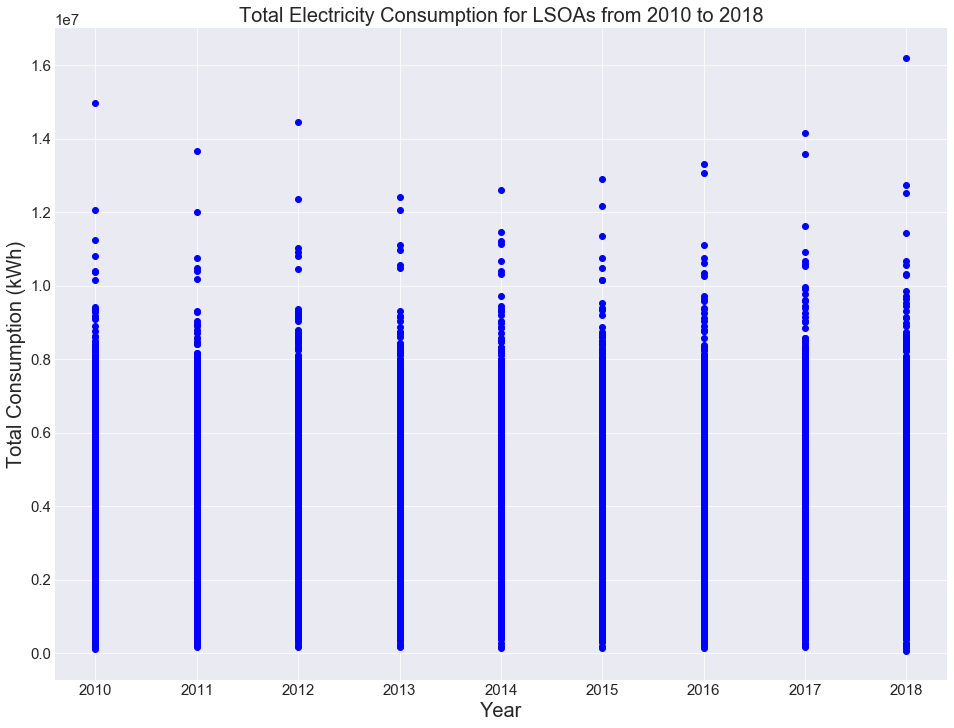

In [33]:
plt.scatter(df_LSOA_Consumption.Year, df_LSOA_Consumption.Total_domestic_electricity_consumption_kWh, color='blue')
plt.xlabel("Year")
plt.ylabel("Total Consumption (kWh)")
plt.title("Total Electricity Consumption for LSOAs from 2010 to 2018")
plt.show()

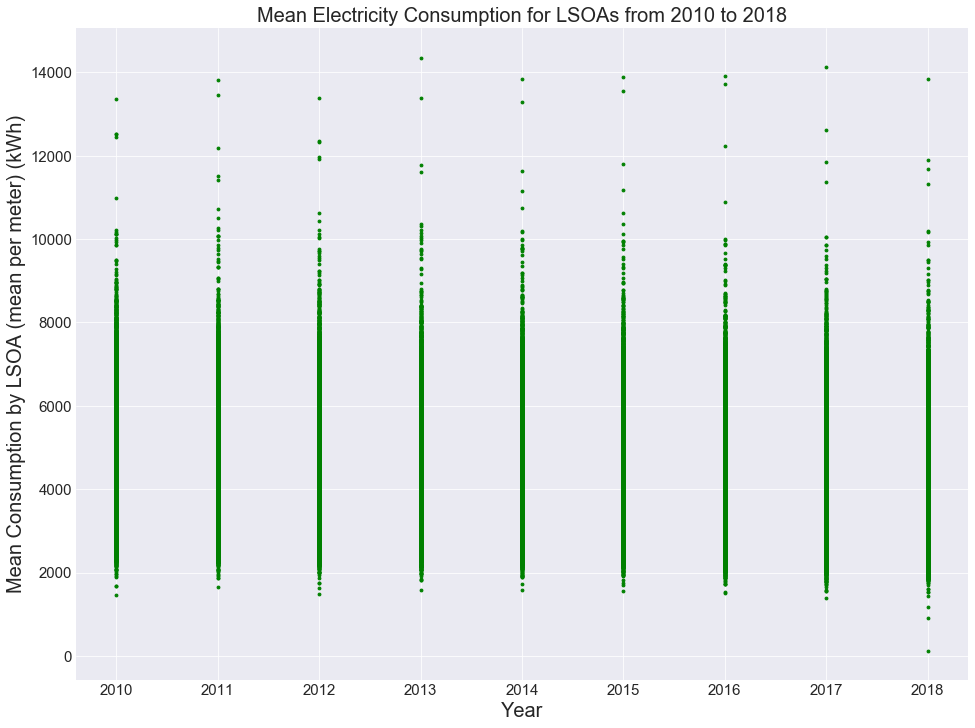

In [34]:
plt.scatter(df_LSOA_Consumption.Year, df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter, color='green', s=8)
plt.xlabel("Year")
plt.ylabel("Mean Consumption by LSOA (mean per meter) (kWh)")
plt.title("Mean Electricity Consumption for LSOAs from 2010 to 2018")
plt.show()

Histogram of mean electricity consumption shows a positive skew and a long tail, which is consistent with the expectation that there will be a core range of electricity consumption with fewer larger domestic electricity consumers. 
These larger consumers would be expected to be larger properties and potentially in wealthier locations.

In [21]:
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=30) 
matplotlib.rc('axes', titlesize=30) 


Mean is 3921.8184592620282
Standard deviation is 901.6248739827633


Text(0.5,1,'Histogram of Mean Consumption (kWh) (40 bins)')

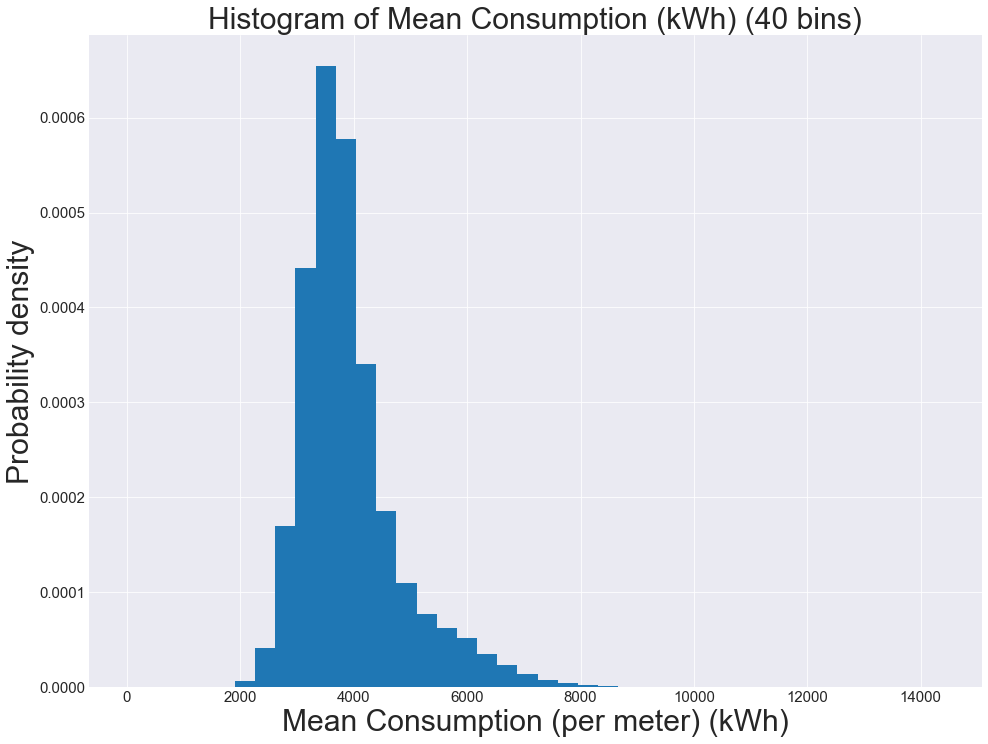

In [22]:
fig, ax = plt.subplots()

nu_bins = 40

plt.hist(df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter, bins=nu_bins, density=True)

mu = (df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter).mean()  # mean of distribution
sigma = (df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter).std()  # standard deviation of distribution

print("Mean is " +str(mu))
print("Standard deviation is " +str(sigma))

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (nu_bins - mu))**2))
ax.plot(nu_bins, y, '--', color='green')
ax.set_xlabel('Mean Consumption (per meter) (kWh)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Mean Consumption (kWh) (40 bins)')


Mean is 3921.8184592620282
Standard deviation is 901.6248739827633


Text(0.5,1,'Histogram of Mean Consumption (kWh) (20 bins, between a range of 1000 to 11000kWh)')

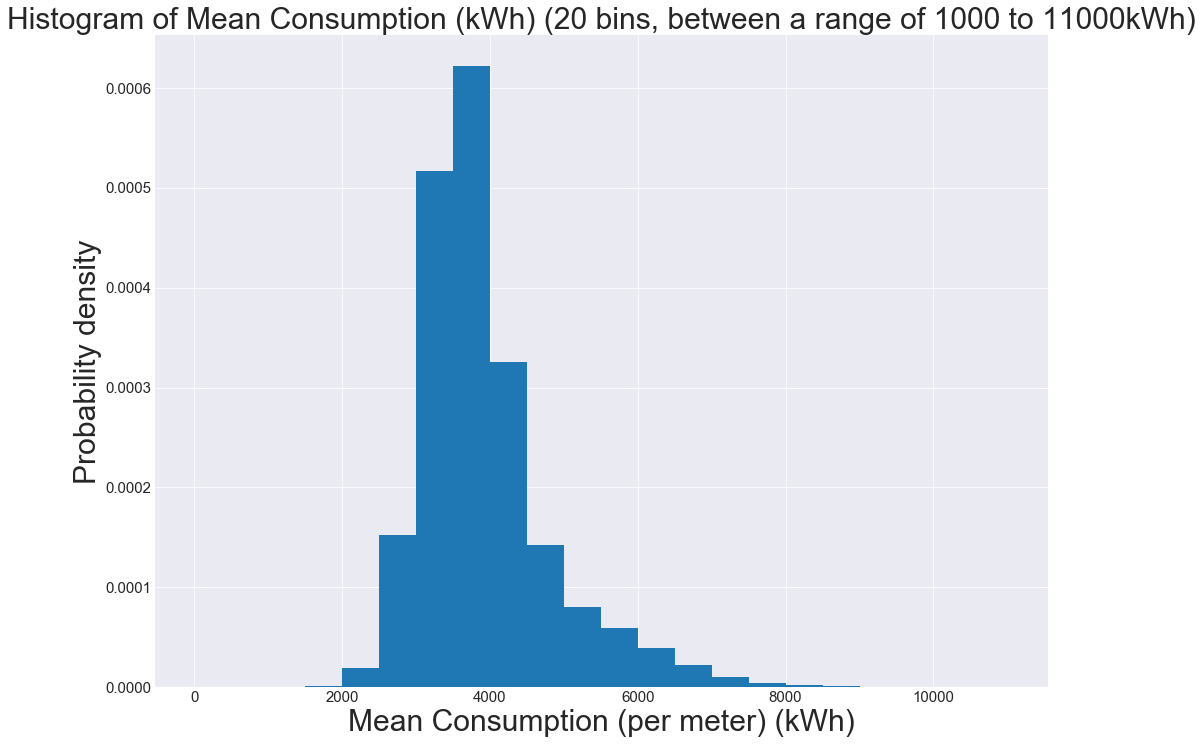

In [23]:
fig, ax = plt.subplots()

nu_bins = 20

plt.hist(df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter, bins=nu_bins, range=(1000, 11000), density=True)

mu = (df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter).mean()  # mean of distribution
sigma = (df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter).std()  # standard deviation of distribution

print("Mean is " +str(mu))
print("Standard deviation is " +str(sigma))

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (nu_bins - mu))**2))
ax.plot(nu_bins, y, '--', color='green')
ax.set_xlabel('Mean Consumption (per meter) (kWh)')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of Mean Consumption (kWh) (20 bins, between a range of 1000 to 11000kWh)')



The same understanding can similarly be read and is backed up by the box-plot diagram below.

{'whiskers': [<matplotlib.lines.Line2D at 0x2b3054849b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b30546c2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b305484860>],
 'medians': [<matplotlib.lines.Line2D at 0x2b30546cb00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b30546cf28>],
 'means': []}

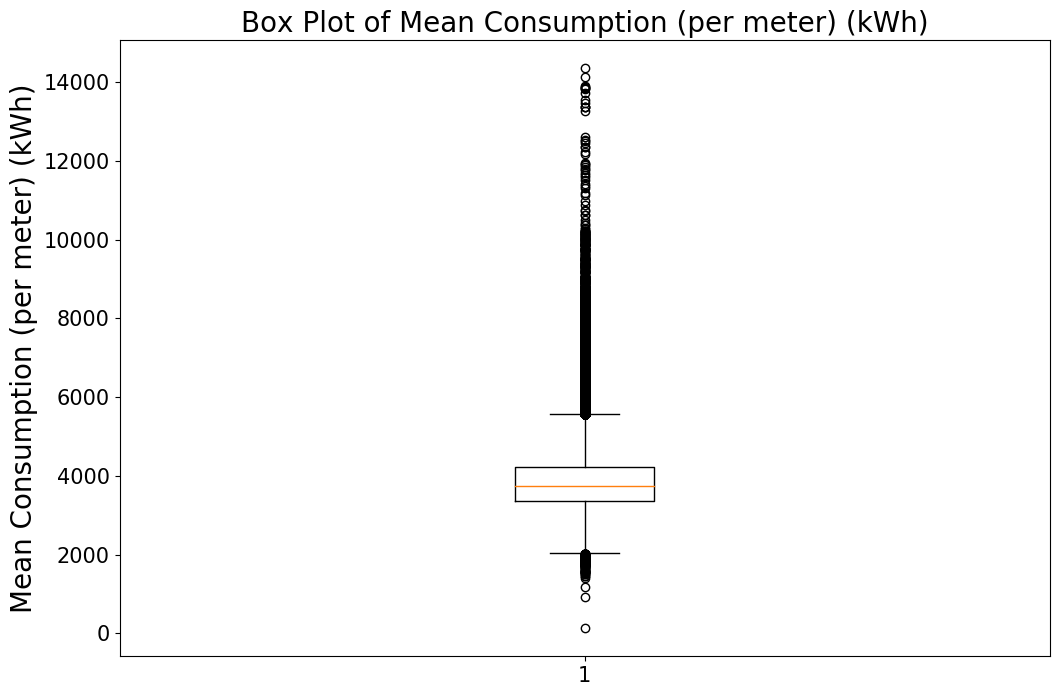

In [75]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [12, 8]
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
matplotlib.rc('axes', labelsize=20) 
matplotlib.rc('axes', titlesize=20) 

fig1, ax1 = plt.subplots()
ax1.set_title('Box Plot of Mean Consumption (per meter) (kWh)')
ax1.set_ylabel('Mean Consumption (per meter) (kWh)')
ax1.boxplot(df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter)

Text(0,0.5,'Mean Consumption (per meter) (kWh)')

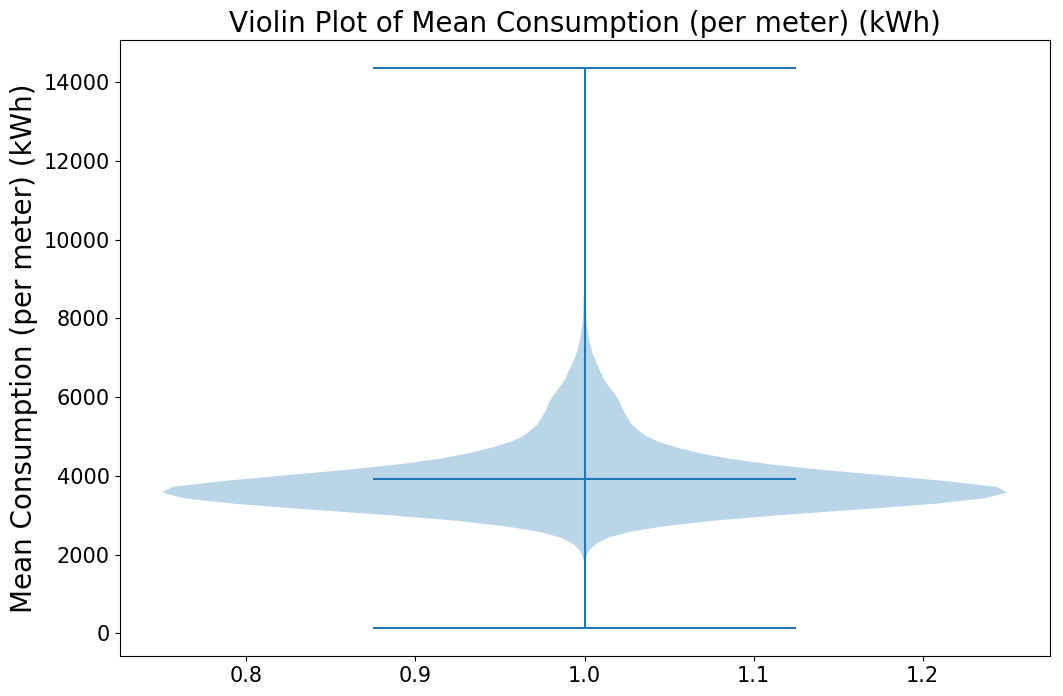

In [76]:
# plot violin plot
fig1, ax1 = plt.subplots()
ax1.violinplot(df_LSOA_Consumption.Mean_domestic_electricity_consumption_kWh_per_meter,
                  showmeans=True,
                  showmedians=False)
ax1.set_title('Violin Plot of Mean Consumption (per meter) (kWh)')
ax1.set_ylabel('Mean Consumption (per meter) (kWh)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


TypeError: regplot() got an unexpected keyword argument 'height'

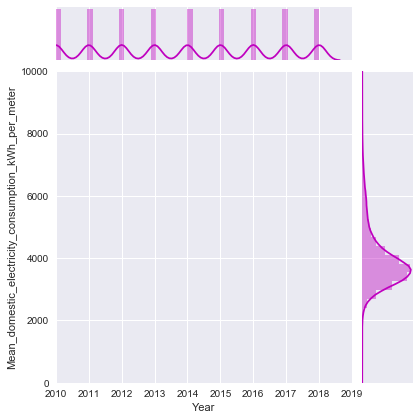

In [24]:
sns.set(style="darkgrid")

data = df_LSOA_Consumption
g = sns.jointplot(x="Year", y="Mean_domestic_electricity_consumption_kWh_per_meter", data=data,
                  kind="reg", truncate=False,
                  xlim=(2010, 2019), ylim=(0, 10000),
                  color="m", height=7)

In [ ]:
sns.distplot(df_LSOA_Consumption, x="Year")

In [ ]:
sns.__version__